In [2]:
#import the required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline    
#when your figure is large it will get open in seprate windows so to avoid that we use this line
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
#load the data

In [5]:
df=pd.read_csv("auto-mpg.csv")

In [6]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
df.shape

(398, 9)

In [8]:
#dropping unnecessary columns
df.drop('car name',axis=1)

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [10]:
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car name    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC7FABAE20>,
      dtype=object)

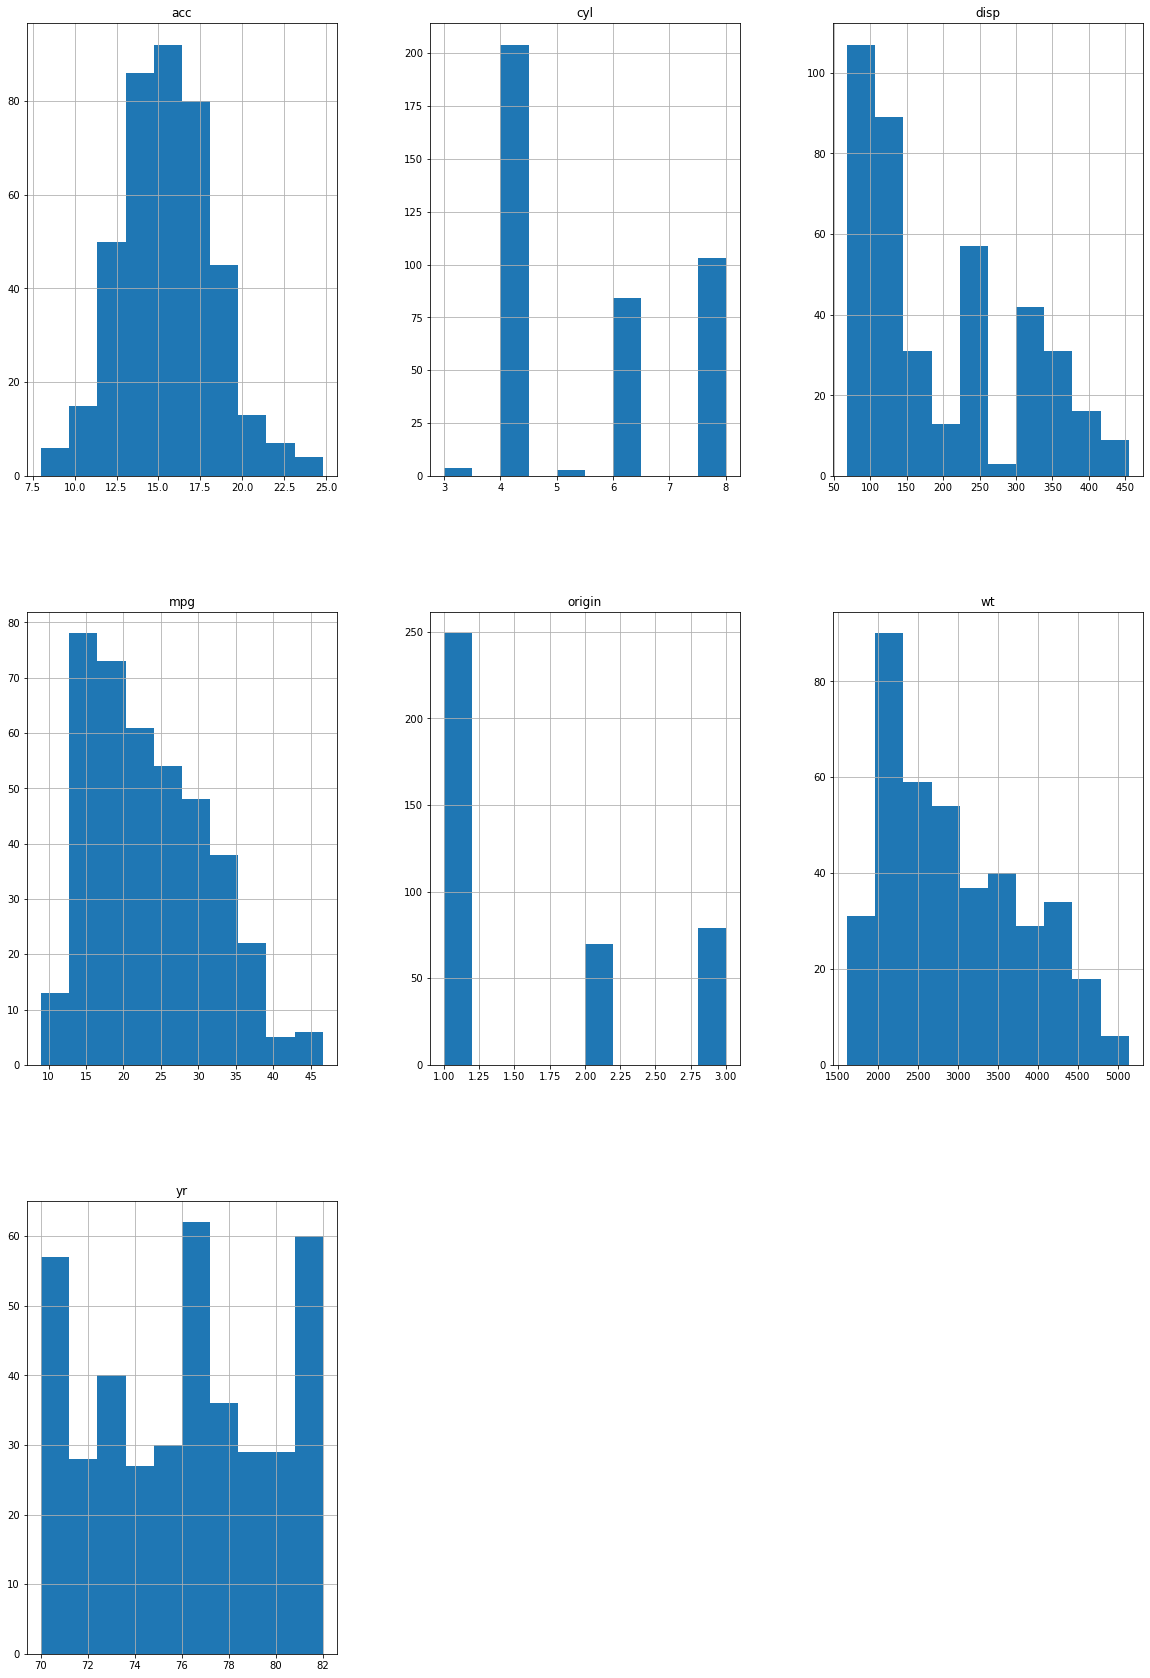

In [12]:
df.hist(figsize=(20,30))

In [13]:
corr=df.corr()
corr

,mpg,cyl,disp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
wt,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


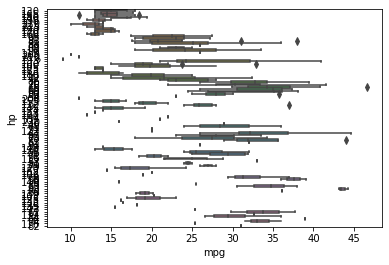

In [14]:
sns.boxplot(x='mpg',y='hp', data=df)

In [15]:
# For origin we will be doing one hot encoding For replacing categorical values to original values

In [16]:
df['origin']=df['origin'].replace({1:'America',2:"Europe",3:'India'})

In [17]:
df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,America,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,America,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,America,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,America,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,America,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,America,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,America,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,America,ford ranger


In [18]:
df=pd.get_dummies(df,columns=['origin'])

In [19]:
df

,mpg,cyl,disp,hp,wt,acc,yr,car name,origin_America,origin_Europe,origin_India
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,vw pickup,0,1,0
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,ford ranger,1,0,0


In [20]:
df=df.drop('car name',axis=1)

In [21]:
df

,mpg,cyl,disp,hp,wt,acc,yr,origin_America,origin_Europe,origin_India
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,1,0
395,32.0,4,135.0,84,2295,11.6,82,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0


In [22]:
df.describe()    # here HP column is missing, when we check csv, there are some ? present in that, so we have to handle it.

,mpg,cyl,disp,wt,acc,yr,origin_America,origin_Europe,origin_India
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.175879,0.198492
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.381197,0.399367
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [23]:
#check is isDigit present in HP or not
hpisdigit=pd.DataFrame(df.hp.str.isdigit())

In [24]:
hpisdigit

,hp
0,True
1,True
2,True
3,True
4,True
...,...
393,True
394,True
395,True
396,True


In [25]:
df[hpisdigit['hp']==False]       #Print only thosse rows which are null. 

,mpg,cyl,disp,hp,wt,acc,yr,origin_America,origin_Europe,origin_India
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,1,0
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,1,0
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [26]:
df.isnull().sum()   # hp has 0 null value, it is missing hidden values.

mpg               0
cyl               0
disp              0
hp                0
wt                0
acc               0
yr                0
origin_America    0
origin_Europe     0
origin_India      0
dtype: int64

In [27]:
#Now we replace ? values with nan value
df=df.replace('?',np.nan)
df[hpisdigit['hp']==False]    

,mpg,cyl,disp,hp,wt,acc,yr,origin_America,origin_Europe,origin_India
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,1,0
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,1,0
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [28]:
#Now we want to change the missing values with the median
#There are many ways to do that
df.median()

mpg                 23.0
cyl                  4.0
disp               148.5
hp                  93.5
wt                2803.5
acc                 15.5
yr                  76.0
origin_America       1.0
origin_Europe        0.0
origin_India         0.0
dtype: float64

In [29]:
#We will create a lambda function for replacing
medianFiller = lambda x:x.fillna(x.median())

df=df.apply(medianFiller,axis=0)

In [30]:
df['hp']=df['hp'].astype('float64')  # we are changing the data type of hp from object to float

In [31]:
df[hpisdigit['hp']==False]    

,mpg,cyl,disp,hp,wt,acc,yr,origin_America,origin_Europe,origin_India
32,25.0,4,98.0,93.5,2046,19.0,71,1,0,0
126,21.0,6,200.0,93.5,2875,17.0,74,1,0,0
330,40.9,4,85.0,93.5,1835,17.3,80,0,1,0
336,23.6,4,140.0,93.5,2905,14.3,80,1,0,0
354,34.5,4,100.0,93.5,2320,15.8,81,0,1,0
374,23.0,4,151.0,93.5,3035,20.5,82,1,0,0


In [32]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_America,origin_Europe,origin_India
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


In [33]:
#Bivariant Plot

C:\Users\Swastik\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Swastik\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


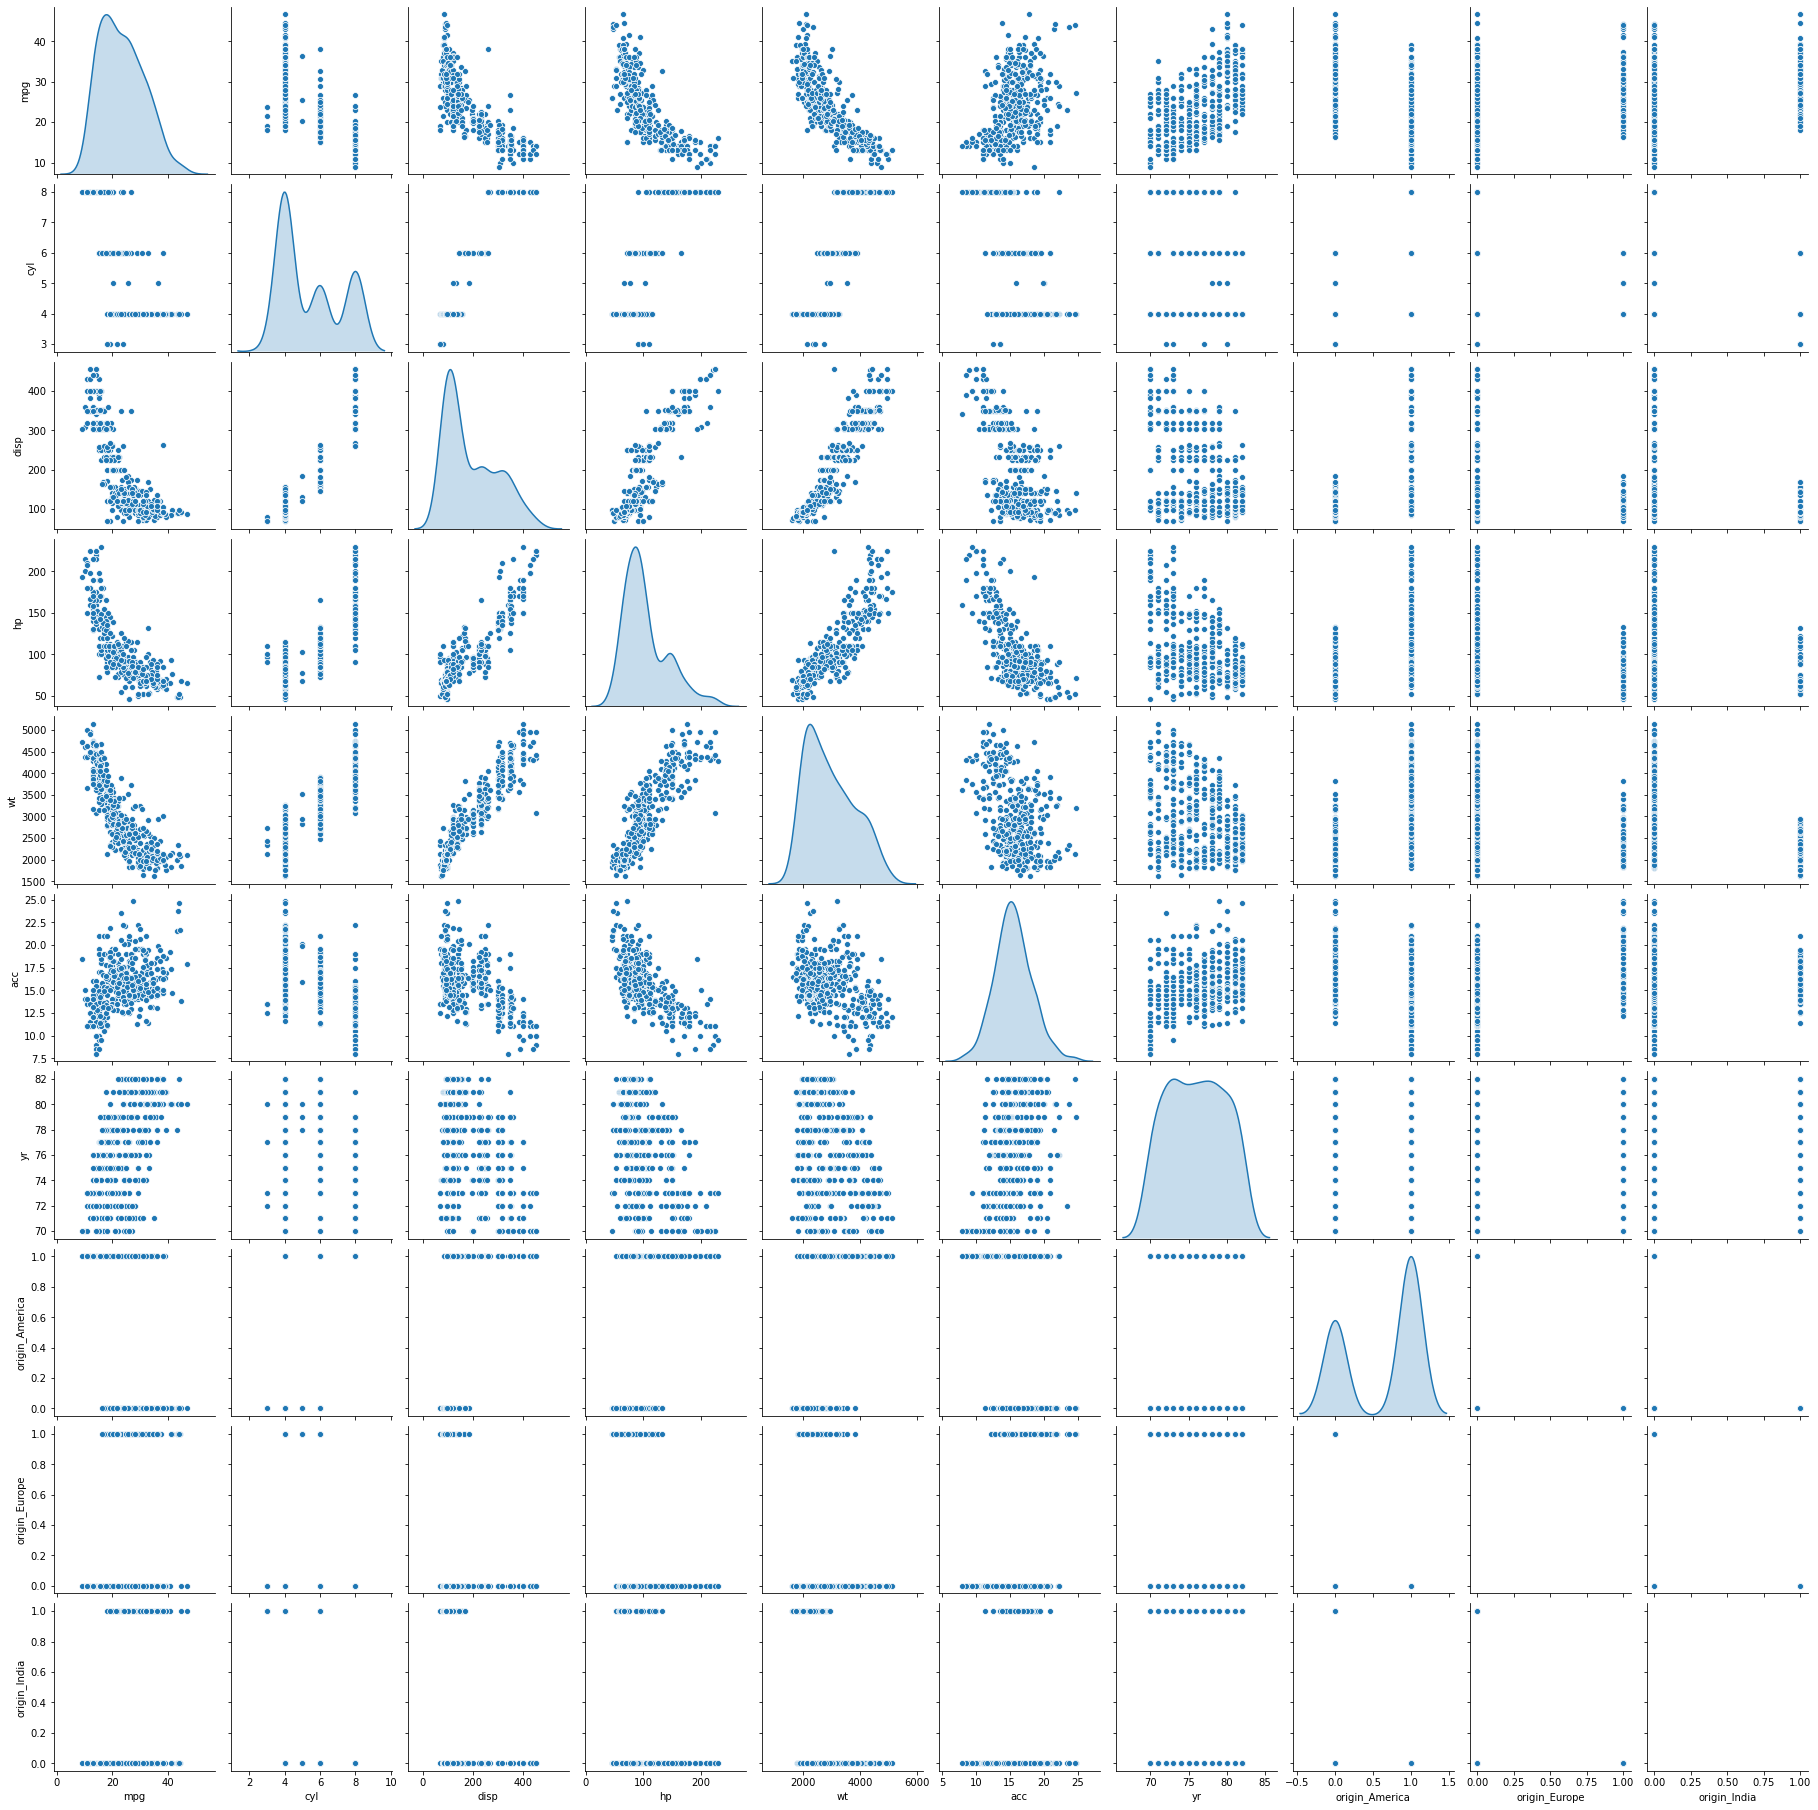

In [34]:
sns.pairplot(df,diag_kind='kde')

In [35]:
df_temp=df.iloc[:,0:7]     # for visualising only the columns we are interested in, rather than all columns

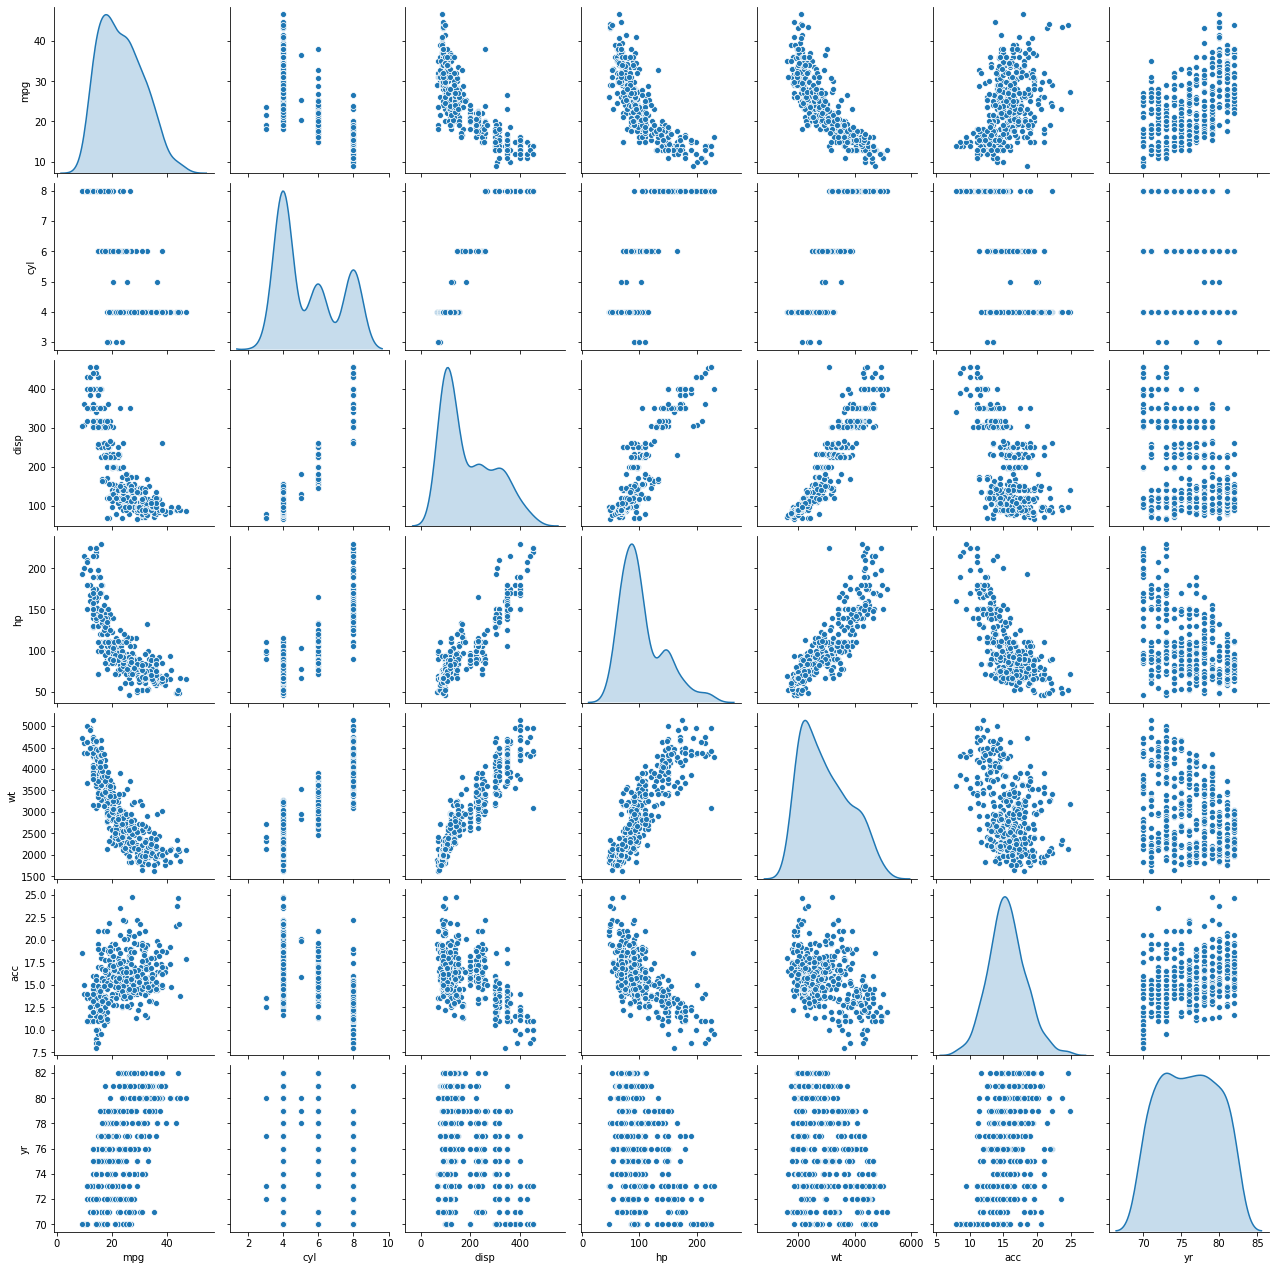

In [36]:
sns.pairplot(df_temp,diag_kind='kde')

In [37]:
corr=df.corr()
corr

,mpg,cyl,disp,hp,wt,acc,yr,origin_America,origin_Europe,origin_India
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,-0.568192,0.259022,0.442174
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,0.604351,-0.352861,-0.396479
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,0.651407,-0.373886,-0.433505
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,0.485418,-0.282877,-0.318972
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,0.598398,-0.298843,-0.440817
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,-0.250806,0.204473,0.109144
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,-0.139883,-0.024489,0.193101
origin_America,-0.568192,0.604351,0.651407,0.485418,0.598398,-0.250806,-0.139883,1.000000,-0.597198,-0.643317
origin_Europe,0.259022,-0.352861,-0.373886,-0.282877,-0.298843,0.204473,-0.024489,-0.597198,1.000000,-0.229895
origin_India,0.442174,-0.396479,-0.433505,-0.318972,-0.440817,0.109144,0.193101,-0.643317,-0.229895,1.000000


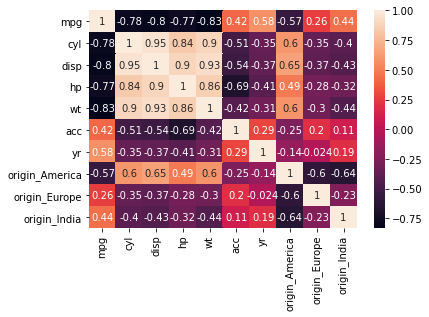

In [38]:
sns.heatmap(corr,annot=True)

In [71]:
df.shape

(398, 10)

#Split the data

In [39]:
#We need to build our data
#make the independent and dependent variables
x=df.drop('mpg',axis=1)
y=df['mpg']

In [76]:
print(X_train.shape)
x_train.shape

(278, 9)


(119, 9)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)   #random state will ensure that each time we will get same data in training and test during splitting

#Fitting of model

In [78]:
reg_model=LinearRegression()

In [79]:
reg_model.fit(x_train,y_train)

LinearRegression()

In [80]:
y_pred=reg_model.predict(x_test)

In [81]:
y_pred.shape

(120,)

In [82]:
y_train.shape

(278,)

In [83]:
reg_model.score(x_train,y_train)

0.8141025501610559

In [84]:
reg_model.score(x_test,y_test)

0.8433135132808827

In [85]:
from sklearn.metrics import r2_score

In [86]:
score=r2_score(y_test,y_pred)

In [87]:
score

0.8433135132808827

In [88]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:
from sklearn import linear_model

In [90]:
poly=PolynomialFeatures(degree=2,interaction_only=True)

In [91]:
x2_train=poly.fit_transform(x_train)
x2_test=poly.fit_transform(x_test)

In [92]:
poly_clf=LinearRegression()
poly_clf.fit(x2_train,y_train)

LinearRegression()

In [93]:
print(poly_clf.score(x2_train,y_train))

0.8995492105619429


In [94]:
print(poly_clf.score(x2_test,y_test))

0.8613490751166345


In [95]:
print(x_train.shape)
print(x2_train.shape)

(278, 9)
(278, 46)
